In [10]:
# 1A
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
def plot_surface(data):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection="3d")
    ax.plot_surface(data,Y=data,Z=data,cmap="jet")
    plt.show()

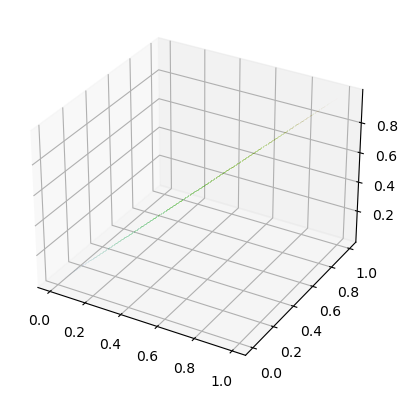

In [16]:
data = np.random.rand(100,10)
plot_surface(data)

In [2]:
#1B
from collections import defaultdict
 
class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
    def addEdge(self, u, v):
        self.graph[u].append(v)
    def BFS(self, s):
        visited = [False] * (max(self.graph) + 1)
        queue = []
        queue.append(s)
        visited[s] = True
 
        while queue:
            s = queue.pop(0)
            print(s, end=" ")
            for i in self.graph[s]:
                if visited[i] == False:
                    queue.append(i)
                    visited[i] = True
g = Graph()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
 
print("Following is Breadth First Traversal"
          " (starting from vertex 2)")
g.BFS(2)

Following is Breadth First Traversal (starting from vertex 2)
2 0 3 1 

In [2]:
#2A
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def contour_plot(data,n):
    x,y = np.meshgrid(*data.T)
    plt.contour(x,y,data,n)
    plt.show()

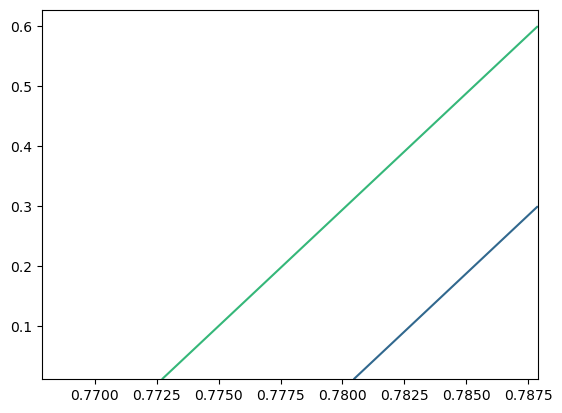

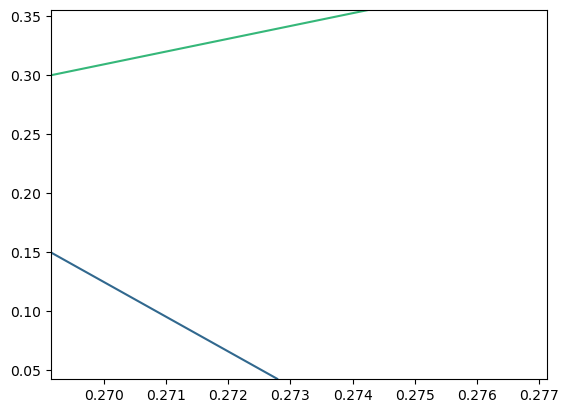

In [6]:
data = np.random.rand(2,2,2)
for i in range(data.shape[0]):
    contour_plot(data[i],data.shape[0])

In [15]:
#2b
class Node():
    """A Node class for A* Pathfinding"""
    # Constructor for Node class.
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = self.h = self.f = 0
    # Comparator for Node class
    def __eq__(self, temp):
        return self.position == temp.position

# Boolean function to check if 
# a move is valid or not.
def notValid(nodePosition,n,m):
    return nodePosition[0] > n-1 or nodePosition[0] < 0 \
    or nodePosition[1] > m-1 or nodePosition[1] < 0

# A* algorithm function
def A_Star(board, src, dest):
    """This function returns a list of
    tuples representing the path from the given 
    src node to the given dest node in the given board"""
    # Creating the src and dest node
    # with parent as None.
    srcNode = Node(None, src)
    destNode = Node(None, dest)
    

    # Initializing both openList and 
    # closedList as empty list.
    openList = []
    closedList = []

    # Append srcNode in openList. 
    openList.append(srcNode)

    # Iterate until we reach the 
    # dest Node. 
    while len(openList) > 0:

        # Get the current node
        currentNode = openList[0]
        currentIndex = 0
        # Iterate over the openList to find 
        # node with least 'f'. 
        for index, item in enumerate(openList):
            if item.f < currentNode.f:
                currentNode = item
                currentIndex = index

        # Pop the found node off openList,
        # and add it to the closedList. 
        openList.pop(currentIndex)
        closedList.append(currentNode)

        # If reached the dest.
        if currentNode == destNode:
            # Initializng the 'path' list. 
            path = []
            current = currentNode
            # Adding currentposition in path 
            # and the moving to its parent until 
            # we reach None (parent of src). 
            while current is not None:
                path.append(current.position)
                current = current.parent
            # Returning the reversed path (to make
            # it src -> dest, instead of dest -> src.
            return path[::-1] 

        # Generate children
        children = []
        dirs=((0, -1), (0, 1), (-1, 0), (1, 0),
        (-1, -1), (-1, 1), (1, -1), (1, 1))
        # Iterate over neighouring cells.
        for newPosition in dirs: 

            # Find the position of new Node.
            nodePosition = (currentNode.position[0] + newPosition[0], 
            currentNode.position[1] + newPosition[1])

            # If the new position is not valid (lies outside the board)
            # then do not proceed ahead with this node.
            if(notValid(nodePosition,len(board),
            len(board[len(board)-1]))==True):
                continue
            # Also if the new position contains obstacle, 
            # we can't go ahead.
            if (board[nodePosition[0]][nodePosition[1]] != 0):
                continue
            # Append the node in children list.
            children.append(Node(currentNode, nodePosition))

        # Iterate over children list.
        for child in children:
            
            # If the child is in closedList
            for closedChild in closedList:
                if closedChild == child:
                    continue
            
            # Assign the values of f, g, and h.
            child.g = currentNode.g + 1
            child.h = ((child.position[0] - destNode.position[0]) ** 2) \
            + ((child.position[1] - destNode.position[1]) ** 2)
            child.f = child.g + child.h

            # If the Child is present in OpenList. 
            for openNode in openList:
                if child == openNode and child.g > openNode.g:
                    continue

            # Append the child at the last of open list
            openList.append(child)
        if (len(openList) > len(board)**2*len(board[0])**2): 
            return None

def main():
    board = [
                [0, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 1, 0],                
                [1, 0, 1, 0, 0, 0]
            ]

    src = (1, 0)
    dest = (2, 5)

    pathSrcToDest = A_Star(board, src, dest)
    print(pathSrcToDest)


if __name__ == '__main__':
    main()


[(1, 0), (1, 1), (0, 2), (1, 3), (2, 4), (2, 5)]


In [8]:
#3b 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

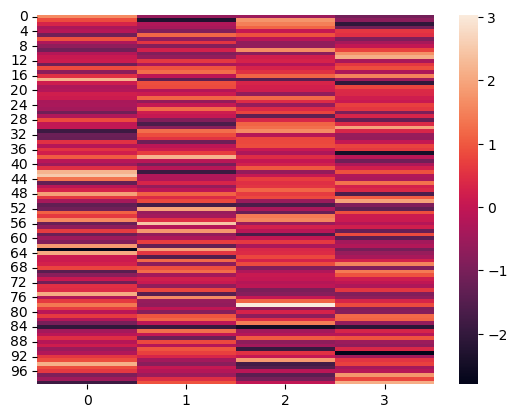

In [9]:
np.random.seed(1)
n = 100
data = np.random.randn(n,4)
sns.heatmap(data)
plt.show()

In [1]:
#3b
import math
def minimax(curDepth,nodeIndex,maxTurn,scores,targetDepth):
    if (curDepth == targetDepth):
        return scores[nodeIndex]
    if (maxTurn):
        return max(minimax(curDepth+1,nodeIndex*2,False,scores,targetDepth),minimax(curDepth+1,nodeIndex*2+1,False,scores,targetDepth))
    else:
         return min(minimax(curDepth+1,nodeIndex*2,True,scores,targetDepth),minimax(curDepth+1,nodeIndex*2+1,True,scores,targetDepth))
scores = [3,5,2,9,12,5,23,23]
treeDepth = math.log(len(scores),2)
print(minimax(0,0,True,scores,treeDepth))

12


C:\Users\prashasti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prashasti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prashasti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prashasti\

NameError: name 'add_trace' is not defined

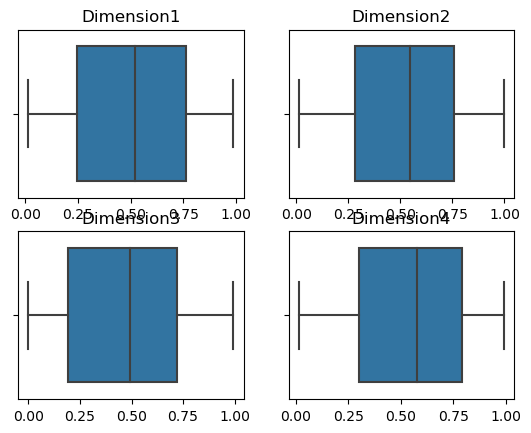

In [4]:
#4A
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
np.random.seed(1)
n = 100
data =  np.random.rand(n,4)
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(data[:,i])
    plt.title('Dimension{}'.format(i+1))
fig = go.Figure()
for i in range(4):
    fig = add_trace(go.Box(X=data[:,i]))
plt.show()

In [15]:
#4B
MAX,MIN = 1000,-1000
def minimax(depth,nodeIndex,maxTurn,values,alpha,beta):
    if depth == 3:
        return values[nodeIndex]
    if maxTurn:
        best = MIN
        for i in range(0,2):
            val = minimax(depth+1,nodeIndex*2+i,False,values,alpha,beta)
            best = max(best,val)
            alpha = max(best,alpha)
            if beta <= alpha:
                break
        return best
    else:
        best = MAX
        for i in range(0,2):
            val = minimax(depth+1,nodeIndex*2+i,True,values,alpha,beta)
            best = min(best,val)
            beta = min(best,beta)
            if beta<=alpha:
                break
        return best
values = [3,5,6,9,1,2,0,-1]
print(minimax(0,0,True,values,MIN,MAX))

5


In [37]:
#6
def minkowski(Q, R, p):
    distance = (np.sum(np.abs(Q - R) * p) * (1 / p))
    return distance
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.metrics import accuracy_score

class KNearestNeighbors:
    def __init__(self, k=3, p_metric=2):
        self.k = k
        self.p_metric = p_metric

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_Pred):
        Y_Pred = [self.classify(x) for x in X_Pred]
        return np.array(Y_Pred)

    def classify(self, x):
        distances = [minkowski(x, x_train, self.p_metric) for x_train in self.X_train]
        idx_k = np.argsort(distances)[:self.k]
        k_labels = [self.Y_train[i] for i in idx_k]
        predicted_class = Counter(k_labels).most_common(1)[0][0]
        return predicted_class

glass = pd.read_csv("glass.csv", skiprows=1)

X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNearestNeighbors(k=3, p_metric=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6875


In [38]:
#7def minkowski(Q, R, p):
    distance = (np.sum(np.abs(Q - R) * p) * (1 / p))
    return distance
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.metrics import accuracy_score

class KNearestNeighbors:
    def __init__(self, k=3, p_metric=2):
        self.k = k
        self.p_metric = p_metric

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_Pred):
        Y_Pred = [self.classify(x) for x in X_Pred]
        return np.array(Y_Pred)

    def classify(self, x):
        distances = [minkowski(x, x_train, self.p_metric) for x_train in self.X_train]
        idx_k = np.argsort(distances)[:self.k]
        k_labels = [self.Y_train[i] for i in idx_k]
        predicted_class = Counter(k_labels).most_common(1)[0][0]
        return predicted_class

glass = pd.read_csv("glass.csv", skiprows=1)

X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNearestNeighbors(k=3, p_metric=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7906976744186046


Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


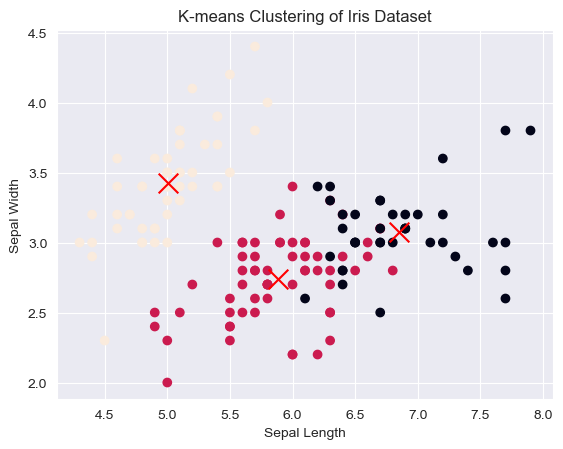

In [40]:
#8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def kmeans(X, K, max_iters=100):
    centroids = X[:K]

    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids
iris = load_iris()
X = iris.data

K = 3
labels, centroids = kmeans(X, K)
print("Labels:", labels)
print("Centroids:", centroids)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

Single-linkage proximity matrix:
[[ 0.          4.         11.70469991 20.         21.54065923]
 [ 4.          0.          8.06225775 16.         17.88854382]
 [11.70469991  8.06225775  0.          9.8488578   9.8488578 ]
 [20.         16.          9.8488578   0.          8.        ]
 [21.54065923 17.88854382  9.8488578   8.          0.        ]]

Complete-linkage proximity matrix:
[[ 0.          4.         11.70469991 20.         21.54065923]
 [ 4.          0.          8.06225775 16.         17.88854382]
 [11.70469991  8.06225775  0.          9.8488578   9.8488578 ]
 [20.         16.          9.8488578   0.          8.        ]
 [21.54065923 17.88854382  9.8488578   8.          0.        ]]


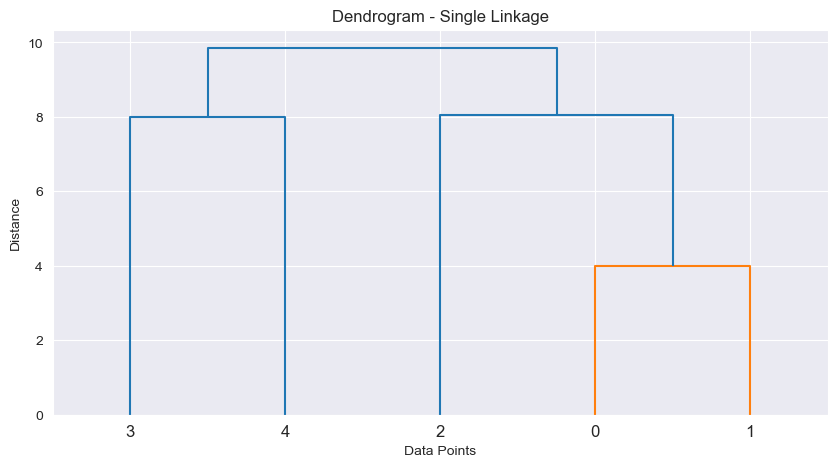

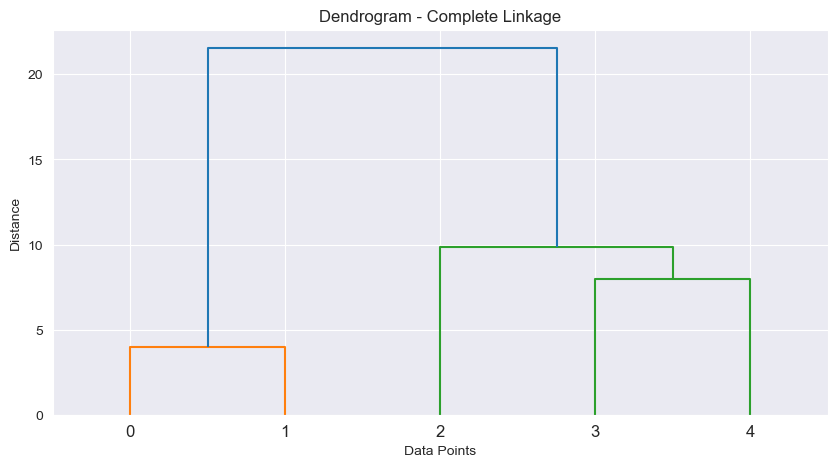

In [50]:
#9
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data = np.array([[4,4],
                 [8,4],
                 [15,8],
                 [24,4],
                 [24,12]])
def single_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))
   
    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.min(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]
   
    return proximity_matrix

def complete_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))
   
    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.max(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]
   
    return proximity_matrix

single_linkage_matrix = single_linkage(data)
print("Single-linkage proximity matrix:")
print(single_linkage_matrix)

complete_linkage_matrix = complete_linkage(data)
print("\nComplete-linkage proximity matrix:")
print(complete_linkage_matrix)

linkage_matrix = linkage(data, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

linkage_matrix = linkage(data, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


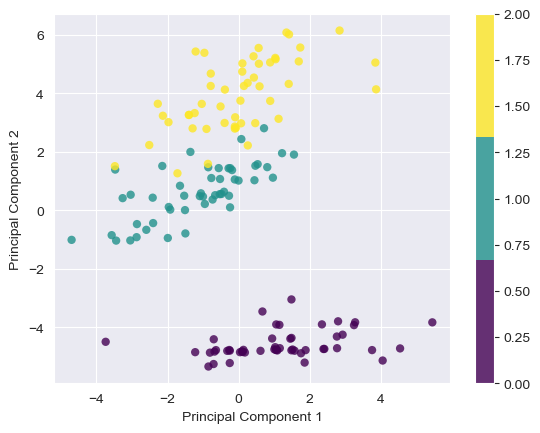

In [51]:
#10 PCA
import numpy as np


class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets

    # data = datasets.load_digits()
    data = datasets.load_iris()
    X = data.data
    y = data.target

    # Project the data onto the 2 primary principal components
    pca = PCA(2)
    pca.fit(X)
    X_projected = pca.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1 = X_projected[:, 0]
    x2 = X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar()
    plt.show()

(4, 4)
(120, 2)


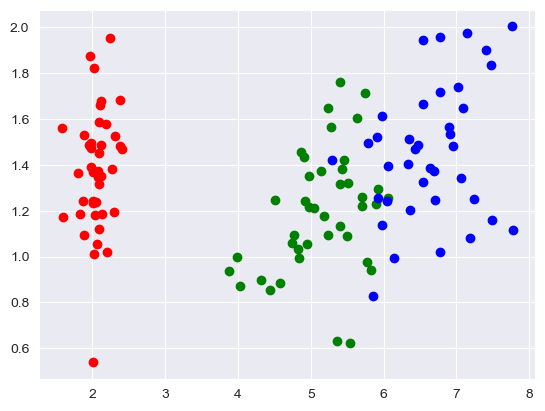

Original Data Size: (120, 4) 
Modified Data Size: (120, 2)


In [54]:
#10 LDA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    
    def transform(self,X,y):
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)

        scatter_t = np.cov(X.T)*(height - 1)
        scatter_w = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
        
        scatter_b = scatter_t - scatter_w
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        print(eig_vectors.shape)
        pc = X.dot(eig_vectors[:,::-1][:,:self.n_components])
        print(pc.shape)

        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                colors = ['r','g','b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=color)
            plt.show()
        return pc

LDA_obj = LDA(n_components=2)
data = load_iris()
X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

LDA_object = LDA(n_components=2)
X_train_modified = LDA_object.transform(X_train, Y_train)

print("Original Data Size:",X_train.shape, "\nModified Data Size:", X_train_modified.shape)

In [8]:
#5
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
  
label_encoder = preprocessing.LabelEncoder()
sns.set_style("darkgrid")
col_names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
data = pd.read_csv("titanic.csv",skiprows=1, header= 0,names=col_names)
data.dropna(subset=["Embarked","Age"], inplace=True)
data.drop("Name",axis=1,inplace=True)
data.drop("SibSp",axis=1,inplace=True)
data.drop("Parch",axis=1,inplace=True)
data.drop("Ticket",axis=1,inplace=True)
data.drop("Cabin",axis=1,inplace=True)
data.drop("PassengerId",axis=1,inplace=True)

data["Sex"]=label_encoder.fit_transform(data["Sex"])
data["Embarked"]=label_encoder.fit_transform(data["Embarked"])
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,1,0,38.0,71.2833,0
1,1,3,0,26.0,7.9250,2
2,1,1,0,35.0,53.1000,2
3,0,3,1,35.0,8.0500,2
5,0,1,1,54.0,51.8625,2
6,0,3,1,2.0,21.0750,2
7,1,3,0,27.0,11.1333,2
8,1,2,0,14.0,30.0708,0
9,1,3,0,4.0,16.7000,2
10,1,1,0,58.0,26.5500,2


In [9]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    sum=0
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
         
    return prior

In [10]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [11]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[1:]

    # calculate prior
    prior = calculate_prior(df, Y)
    
    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

[[111  18]
 [ 29  56]]
0.7648406630660961


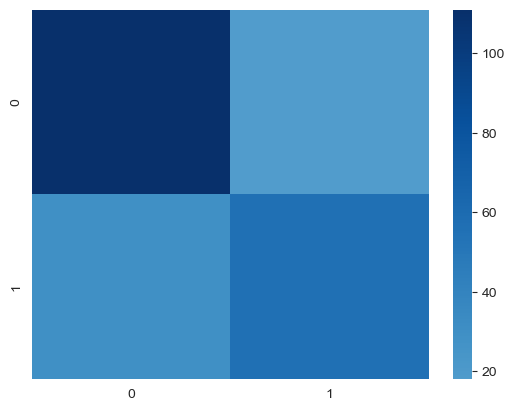

In [12]:
train, test = train_test_split(data, test_size=.3, random_state=41)

X_test = test.iloc[:,1:].values
Y_test = test.iloc[:,0].values


Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Survived")


from sklearn.metrics import confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='macro'))

sns.heatmap(confusion_matrix(Y_test, Y_pred),center=0,cmap="Blues");